In [1]:
from utils import *

import numpy as np

In [10]:
w_next = get_wp_from_random_variate(phot_num=1, scat_num=0, wc=-8)
print(w_next)

Random w': using seed 8683293165691383775
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/lordrick/anaconda3/envs/FRB_Projects/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_515650/1658460715.py", line 1, in <module>
    w_next = get_wp_from_random_variate(phot_num=0, scat_num=0, wc=-8)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tank/kahinga/code_backup/ASTR2_Radiative_Processes_2024_Winter/Final_Project/utils.py", line 201, in get_wp_from_random_variate
IndexError: index 2001 is out of bounds for axis 0 with size 2001

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/lordrick/anaconda3/envs/FRB_Projects/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/hom

In [2]:
make_rw_table()

In [4]:
Rwwp = np.loadtxt('int_table.txt')
Rwwp.shape
#get_pdf(Rwwp)

(2001, 2001)

In [7]:
RN = np.loadtxt('Rwwp_normalized.txt')
RN.shape
get_cdf(RN)

CDF of w' direction is saved as Rwwp_cdf.txt


In [6]:
RCDF = np.loadtxt('Rwwp_cdf.txt')
RCDF.shape

(1001, 1001)

In [1]:
from utils import *

import numpy as np


w = np.array([3,5,7,9])
j = np.random.randint(200,1000,20)

# wp = []
# tau_h = []
# for s in j:
#     for i in w:
#         t = get_wp_from_random_variate(seed=s,wc=i)
#         wp.append(t)
#         tau = get_tau_h(t)
#         tau_h.append(tau)


import matplotlib.pyplot as plt

[0.002410275026242507, 0.0026158484655526247, 0.002848915738432006, 0.0031146128512399636, 0.003419335036696342, 0.0037711267295848045, 0.004180220275055831, 0.0046597920140573805, 0.005227042261706389, 0.0059047683301151396, 0.00672370623397584, 0.007726103425077646, 0.008971323851780174, 0.010544926801396553, 0.012573926237755568, 0.015253573621035424, 0.018896852407237305, 0.02403183382508996, 0.03160856489854551, 0.043484234233877685, 0.06371944043559165, 0.10336928342012719, 0.894219121970692, 104.30620464947417, 2085.3152569225626, 5000.0, 2085.3152569225626, 104.30620464947417, 0.894219121970692, 0.10336928342012719, 0.06371944043559165, 0.043484234233877685, 0.03160856489854551, 0.02403183382508996, 0.018896852407237305, 0.015253573621035424, 0.012573926237755568, 0.010544926801396553, 0.008971323851780174, 0.007726103425077646, 0.00672370623397584, 0.0059047683301151396, 0.005227042261706389, 0.0046597920140573805, 0.004180220275055831, 0.0037711267295848045, 0.003419335036696

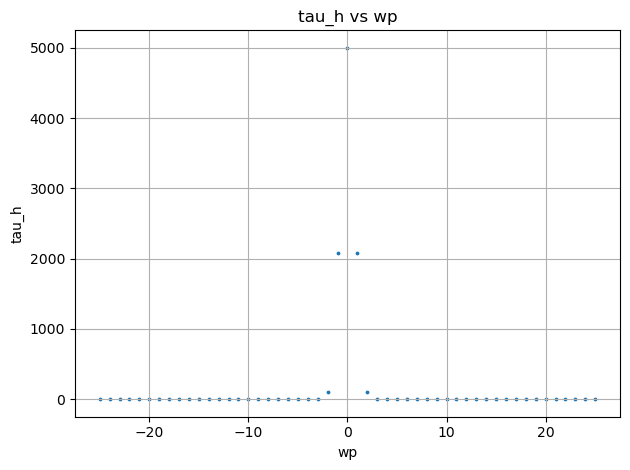

In [5]:
wp = np.linspace(-25,25,51)


t = []
for i in wp:
    tau_h = get_tau_h(i)
    t.append(tau_h)
print(t)
plt.scatter(wp,t,s=3)
plt.xlabel('wp')
plt.ylabel('tau_h')

plt.title('tau_h vs wp')

plt.grid()
plt.tight_layout()


plt.savefig('tau_h_vs_wp.jpg',dpi=300)
plt.show()

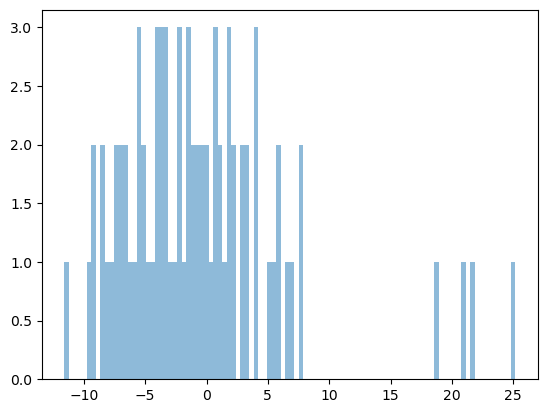

In [9]:
plt.hist(wp, bins=100, alpha=0.5, label='wp')
plt.show()

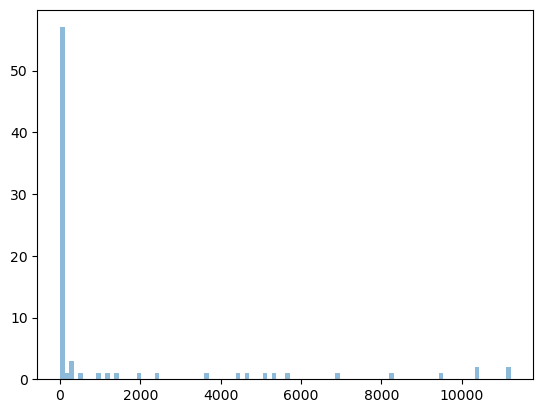

In [10]:
plt.hist(tau_h, bins=100, alpha=0.5, label='tau_h')
plt.show()

Text(0.5, 0, 'escape_w')

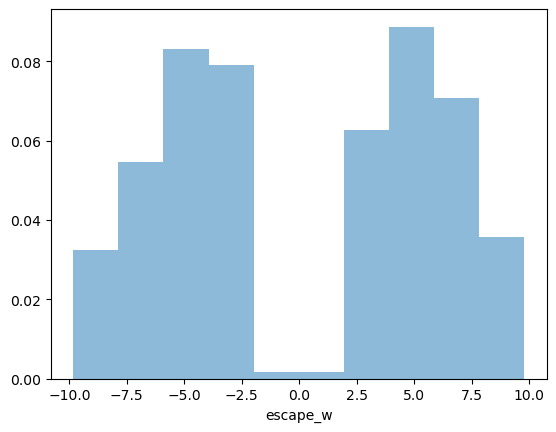

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
res = pd.read_csv('tests/tentative.txt')
res
# Plot a pdf of res['escape_w']

plt.hist(res['escape_w'], bins=10, alpha=0.5, label='escape_w',density=True)
plt.xlabel('escape_w')



In [20]:
import numpy as np
from numpy.random import default_rng
def get_wp_from_random_variate(phot_num=0,scat_num=0,Rint=None,wc=1):
    
    if Rint is None:
        Rint = np.loadtxt('Rwwp_cdf.txt')
    
    #how many random variates?
    seed = (phot_num+55)*(scat_num+666)*103
    print(f'Random variate: using seed {seed}')
    rng = default_rng(seed)
    n_rand = 100000

    #get the xi_p
    xi_p = rng.uniform(0,1,n_rand)

    #make our array of output wp values
    wpc = np.zeros(n_rand)
    w_min  = -10.0
    w_max  =  10.0
    wp_min = -30.0
    wp_max =  30.0

    #how many samples in each direction?
    n_w  = 1001
    n_wp = 1001

    #produce arrays of w, w'
    w = np.linspace(w_min,w_max,n_w)
    wp = np.linspace(wp_min, wp_max, n_wp)

    #begin a loop over the random variates
        
    #what is our range of w,w'?

    #find the w indices bounding current w
    wi = np.searchsorted(w,wc,side="left")
    
    #define i, i+1
    i   = wi-1
    ip1 = wi
    
    #embed()
    #find the wp indices bounding xi_p
    
    wpi  = np.searchsorted(Rint[:,i],xi_p[scat_num])
    wpia = np.searchsorted(Rint[:,ip1],xi_p[scat_num])

    #define j, j+1 for each w
    j  = wpi-1
    ja = wpia-1
    
    #ensure the bounding box is large enough
    if(j>ja):
        ja = j
    elif(j<ja):
        j = ja
        
    jp1 = j+1
        
    #define t, z0, z1, z2, z3, and z
    t = (wc - w[i])/(w[ip1]-w[i])
    z0 = Rint[j,i]
    z1 = Rint[jp1,i]
    z2 = Rint[j,ip1]
    z3 = Rint[jp1,ip1]
    
    #find u
    u = (xi_p[20] - z2*t - z0*(1.-t))/((z1-z0)*(1.-t) + (z3-z2)*t)
    
    #get wp
    wpc = u*(wp[jp1] - wp[j]) + wp[j]

    return wpc
p = []
for k in np.random.randint(700,3000,150):
    p.append(get_wp_from_random_variate(20,k,wc=2.5))

Random variate: using seed 28049475
Random variate: using seed 19606050
Random variate: using seed 22904625
Random variate: using seed 23097750
Random variate: using seed 12707625
Random variate: using seed 14144475
Random variate: using seed 27501000
Random variate: using seed 24951750
Random variate: using seed 24210150
Random variate: using seed 11255325
Random variate: using seed 14067225
Random variate: using seed 21753600
Random variate: using seed 27964500
Random variate: using seed 23723475
Random variate: using seed 12112800
Random variate: using seed 27230625
Random variate: using seed 17798400
Random variate: using seed 24526875
Random variate: using seed 23352675
Random variate: using seed 18370050
Random variate: using seed 17574375
Random variate: using seed 25198950
Random variate: using seed 21274650
Random variate: using seed 26226375
Random variate: using seed 16979550
Random variate: using seed 19250700
Random variate: using seed 13333350
Random variate: using seed 2

In [23]:
np.array(p).max()

7.097038684464646